In [34]:
import numpy as np
from astropy.io import ascii

import matplotlib.pyplot as plt
import matplotlib as mpl

In [63]:
import _pickle as cPickle
from matplotlib.path import Path

In [64]:
cat = np.genfromtxt('../catRawMags20Aug/catDir_HOROLOGIUM-I/sgCut_HOROLOGIUM-I_tcCut.dat',names=True)
xa = cat['xt1_f606w']
ya = cat['yt1_f606w']
flux_606 = cat['flux_f606w']

In [4]:
orientat = -84.68262068777894 
theta = np.deg2rad(orientat)
c,s = np.cos(theta), np.sin(theta)

In [5]:
#IMAGE BOUNDARY
IMAGE = Path([ [220,4045],
              [4217,4248],
              [4099,100],
              [0,0],
              [220,4045]])

In [6]:
xpath = np.array([220,4217,4099,0])
ypath = np.array([4045,4248,100,0])
xgap = np.array([100,99,4157,4156])
ygap = np.array([2033,2078,2233,2187])

x0 = (4248)/2
y0 = 4248/2

xpT = c*(xpath-x0+300) - s*(ypath-y0+400) + x0+300
ypT = s*(xpath-x0+300) + c*(ypath-y0+400) + y0+400
xgT = c*(xgap-x0+300) - s*(ygap-y0+400) + x0+300
ygT = s*(xgap-x0+300) + c*(ygap-y0+400) + y0+400
xT = c*(xa-x0+300) - s*(ya-y0+400) + x0+300
yT = s*(xa-x0+300) + c*(ya-y0+400) + y0+400
xgood = xT
ygood = yT

In [76]:
print(c*(x0-x0+300) - s*(y0-y0+400) + x0+300)

4324.439454858057


In [77]:
print(s*(x0-x0+300) + c*(y0-y0+400) + y0+400)

2284.8192328978485


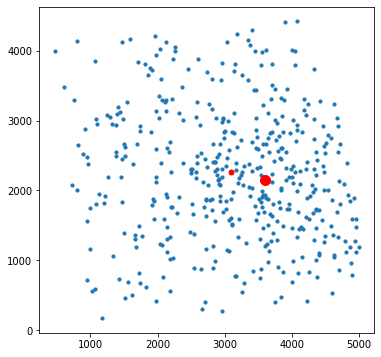

In [97]:
fig,ax = plt.subplots(figsize=(6,6))

ax.scatter(xgood,ygood,s=10)
ax.plot(3593.342377662885, 2156.8983238238898,ms=10,color='red',marker='o')
# ax.plot(x0+300,y0+400,marker='o',ms=12,color='red')
ax.plot(3100,2260,marker='o',ms=5,color='red')


plt.show()

In [62]:
print(max(xgood),max(ygood))

4997.563157665636 4420.82706681162


In [7]:
def median_interval(data, alpha=0.32):
    """
    Median including Bayesian credible interval.

    Parameters
    ----------
    data  : posterior samples
    alpha : 1 - confidence interval

    Returns
    -------
    [med,[lo, hi]] : median, lower, and upper percentiles
    
    """
    q = [100*alpha/2., 50, 100*(1-alpha/2.)]
    lo,med,hi = np.percentile(data,q)
    return [med,[lo,hi]]

In [8]:
samples = cPickle.load( open( "hor1mcmc.p", "rb" ) )
#MEDIAN VALUES AND +/-1 SIGMA FOR EACH FIT PARAMETER
rich,[rich_min,rich_max] = median_interval(samples[:,0])
x,[xmin,xmax] = median_interval(samples[:,1])
y,[ymin,ymax] = median_interval(samples[:,2])
hor_ext_fit,[hor_ext_min,hor_ext_max] = median_interval(samples[:,3])
hor_ell_fit,[hor_ell_min,hor_ell_max] = median_interval(samples[:,4])
hor_pa_fit,[hor_pa_min,hor_pa_max] = median_interval(samples[:,5])

res = [rich,rich_min,rich_max,x,xmin,xmax,y,ymin,ymax,hor_ext_fit,hor_ext_min,hor_ext_max,\
       hor_ell_fit,hor_ell_min,hor_ell_max,hor_pa_fit,hor_pa_min,hor_pa_max]#,rich_cluster,rich_cluster_min,rich_cluster_max,x_cluster,x_cluster_min,x_cluster_max,y_cluster,y_cluster_min,y_cluster_max,cluster_ext_fit,cluster_ext_min,cluster_ext_max,cluster_ell_fit,cluster_ell_min,cluster_ell_max,cluster_pa_fit,cluster_pa_min,cluster_pa_max]
# results.append(res)

In [9]:
print(res)

[867.6552879827121, 792.1365518905711, 945.1886753572494, 3593.342377662885, 3457.508391315219, 3746.518044547849, 2156.8983238238898, 2088.551713834557, 2225.82086561419, 2651.6978038248662, 2380.264226967439, 2950.0410691116954, 0.3633989647876723, 0.28044237211627987, 0.4392049734096666, 78.98315185689994, 72.02980469383657, 84.9871861840118]


In [92]:
# BEST-FIT HOR I PARAMETERS (FROM MCMC_STRUCTURAL_FIT)
richness = rich
x0 = x
y0 = y
gal_ext_pix = hor_ext_fit
gal_ell = hor_ell_fit
gal_pa = hor_pa_fit

In [93]:
print(x0,y0)

3593.342377662885 2156.8983238238898


In [11]:
xbin0 = np.ones((179,1))  # (fltarr(267)+1)
xbin1 = np.ones((1,179))  
xbin1[0] = np.arange(0,179,1)
xbin2 = xbin1 * 30 + 15  # (findgen(267)*30. + 15)
xbin = np.matmul(xbin0,xbin2)
ybin = xbin.T

# creating x and y arrays to represent the bins across the image

In [12]:
costh = np.cos(-1 * np.deg2rad(gal_pa))
sinth = np.sin(-1 * np.deg2rad(gal_pa))

dx = xbin - x0
dy = ybin - y0

In [13]:
r1 = (dx * costh - dy * sinth) / (1 - gal_ell)
r2 = (dx * sinth + dy * costh)

radius = np.sqrt(r1**2 + r2**2)
# calculating distances to different bins in the annuli based on the PA

In [68]:
rad_dist = np.sqrt( (xa-x0)**2 + (ya-y0)**2)
sort_idx = np.argsort(rad_dist)
flat_flux = flux_606.flatten()

sorted_rad = rad_dist[sort_idx]
sorted_flux = flat_flux[sort_idx]

total_flux = flat_flux.sum()

In [73]:
part_flux = 0
ii = 0

while part_flux <= (0.5*total_flux):
    part_flux += sorted_flux[ii]
    ii += 1
    
idx_take = ii - 1
rad_half = rad_dist[ii-1]

print(rad_half/1200)  # arcmin

2.3404644575871236


In [14]:
r_h = gal_ext_pix
norm = r_h**2 / (np.pi * (1-gal_ell))
# half light radius squared / (pi * 1-ell)
pdf = norm/((radius**2 + r_h**2)**2)

In [15]:
xdel = 30.
ydel = 30.
pixarea = xdel*ydel  # pixel area in each bin

In [16]:
model_counts_gal = richness*pdf*pixarea  # a 267x267 array

In [17]:
# Observed surface densitygood map
binned_surface_density_30 = np.zeros((179,179))
for ii in range(179):
    for jj in range(179):
        idxgood = np.logical_and(np.logical_and(xgood >= (30 * ii),xgood <= (30 * (ii + 1))),
                     np.logical_and(ygood >= (30 * jj),ygood <= (30 * (jj + 1))))

        tmp = np.where(idxgood)[0]
#         # flipping ii and jj because in IDL, it's col, row.
        binned_surface_density_30[jj,ii] = len(tmp)

In [18]:
# Define annuli
radius1=radius.flatten()
r1 = np.where(radius1 < (0.1 * r_h))
r2 = np.where((radius1 < (0.2 * r_h)) & (radius1 >= (0.1 * r_h)))
r3 = np.where((radius1 < (0.3 * r_h)) & (radius1 >= (0.2 * r_h)))
r4 = np.where((radius1 < (0.4 * r_h)) & (radius1 >= (0.3 * r_h)))
r5 = np.where((radius1 < (0.5 * r_h)) & (radius1 >= (0.4 * r_h)))
r6 = np.where((radius1 < (0.6 * r_h)) & (radius1 >= (0.5 * r_h)))
r7 = np.where((radius1 < (0.7 * r_h)) & (radius1 >= (0.6 * r_h)))
r8 = np.where((radius1 < (0.8 * r_h)) & (radius1 >= (0.7 * r_h)))
r9 = np.where((radius1 < (0.9 * r_h)) & (radius1 >= (0.8 * r_h)))
r10 = np.where((radius1 < r_h) & (radius1 >= (0.9 * r_h)))

In [19]:
# To get the actual indices
r1v = r1[0]
r2v = r2[0]
r3v = r3[0]
r4v = r4[0]
r5v = r5[0]
r6v = r6[0]
r7v = r7[0]
r8v = r8[0]
r9v = r9[0]
r10v = r10[0]

In [41]:
# areas of annuli in arcmin**2
pix_per_arcsec=20

a1 = (np.pi*(r_h*0.1)**2*(1-gal_ell))/(pix_per_arcsec*60)**2
a2 = (np.pi*(r_h*0.2)**2*(1-gal_ell) - np.pi*(r_h*0.1)**2*(1-gal_ell))/(pix_per_arcsec*60)**2
a3 = (np.pi*(r_h*0.3)**2*(1-gal_ell) - np.pi*(r_h*0.2)**2*(1-gal_ell))/(pix_per_arcsec*60)**2
a4 = (np.pi*(r_h*0.4)**2*(1-gal_ell) - np.pi*(r_h*0.3)**2*(1-gal_ell))/(pix_per_arcsec*60)**2
a5 = (np.pi*(r_h*0.5)**2*(1-gal_ell) - np.pi*(r_h*0.4)**2*(1-gal_ell))/(pix_per_arcsec*60)**2
a6 = (np.pi*(r_h*0.6)**2*(1-gal_ell) - np.pi*(r_h*0.5)**2*(1-gal_ell))/(pix_per_arcsec*60)**2
a7 = (np.pi*(r_h*0.7)**2*(1-gal_ell) - np.pi*(r_h*0.6)**2*(1-gal_ell))/(pix_per_arcsec*60)**2
a8 = (np.pi*(r_h*0.8)**2*(1-gal_ell) - np.pi*(r_h*0.7)**2*(1-gal_ell))/(pix_per_arcsec*60)**2
a9 = (np.pi*(r_h*0.9)**2*(1-gal_ell) - np.pi*(r_h*0.8)**2*(1-gal_ell))/(pix_per_arcsec*60)**2
a10 = (np.pi*(r_h*1.0)**2*(1-gal_ell) - np.pi*(r_h*0.9)**2*(1-gal_ell))/(pix_per_arcsec*60)**2

In [42]:
print(a1,a2)

0.09765686513714568 0.29297059541143705


In [43]:
dist_x = np.array([r_h*0.1,r_h*0.2,r_h*0.3,r_h*0.4,r_h*0.5,r_h*0.6,r_h*0.7,r_h*0.8,r_h*0.9,r_h])/1200

In [44]:
ra1 = np.arange(0,10,1)
r_annuli = (ra1 + 0.05) * r_h

binned_surface_density_30f = binned_surface_density_30.flatten()
model_counts_galf = model_counts_gal.flatten()
data_1d = [binned_surface_density_30f[r1v].sum()/a1,
           binned_surface_density_30f[r2v].sum()/a2,
           binned_surface_density_30f[r3v].sum()/a3,
           binned_surface_density_30f[r4v].sum()/a4,
           binned_surface_density_30f[r5v].sum()/a5,
           binned_surface_density_30f[r6v].sum()/a6,
           binned_surface_density_30f[r7v].sum()/a7,
           binned_surface_density_30f[r8v].sum()/a8,
           binned_surface_density_30f[r9v].sum()/a9,
           binned_surface_density_30f[r10v].sum()/a10]

model_1d = [model_counts_galf[r1v].sum()/a1,
            model_counts_galf[r2v].sum()/a2,
            model_counts_galf[r3v].sum()/a3,
            model_counts_galf[r4v].sum()/a4,
            model_counts_galf[r5v].sum()/a5,
            model_counts_galf[r6v].sum()/a6,
            model_counts_galf[r7v].sum()/a7,
            model_counts_galf[r8v].sum()/a8,
            model_counts_galf[r9v].sum()/a9,
            model_counts_galf[r10v].sum()/a10]

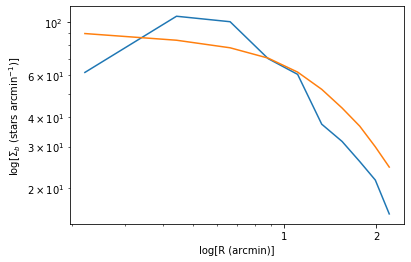

In [45]:
fig, ax = plt.subplots(figsize=(9,7))

ax.plot(dist_x,data_1d,label='Data')
ax.plot(dist_x,model_1d)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylabel(r'log[$\Sigma_b$ (stars arcmin$^{-1}$)]',fontsize=16)
ax.set_xlabel(r'log[R (arcmin)]',fontsize=16)
ax.set_title('Hor I',fontsize=20)

ax.set_xticks([1, 2])
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())



ax.legend()
plt.savefig('figures/hor1.png')

plt.show()

In [46]:
a1

0.09765686513714568

In [49]:
samples = cPickle.load( open( "hor1mcmcEXP.p", "rb" ) )
#MEDIAN VALUES AND +/-1 SIGMA FOR EACH FIT PARAMETER
rich2,[rich_min,rich_max] = median_interval(samples[:,0])
x2,[xmin,xmax] = median_interval(samples[:,1])
y2,[ymin,ymax] = median_interval(samples[:,2])
hor_ext_fit2,[hor_ext_min,hor_ext_max] = median_interval(samples[:,3])
hor_ell_fit2,[hor_ell_min,hor_ell_max] = median_interval(samples[:,4])
hor_pa_fit2,[hor_pa_min,hor_pa_max] = median_interval(samples[:,5])

res2 = [rich2,rich_min,rich_max,x2,xmin,xmax,y2,ymin,ymax,hor_ext_fit2,hor_ext_min,hor_ext_max,\
       hor_ell_fit2,hor_ell_min,hor_ell_max,hor_pa_fit2,hor_pa_min,hor_pa_max]#,rich_cluster,rich_cluster_min,rich_cluster_max,x_cluster,x_cluster_min,x_cluster_max,y_cluster,y_cluster_min,y_cluster_max,cluster_ext_fit,cluster_ext_min,cluster_ext_max,cluster_ell_fit,cluster_ell_min,cluster_ell_max,cluster_pa_fit,cluster_pa_min,cluster_pa_max]
# results.append(res)

In [50]:
print(res2)

[861.5136666312228, 776.4319689137357, 944.5222109630377, 3598.359017494765, 3470.1137918102195, 3739.8057578163694, 2146.45917804443, 2076.528683174721, 2217.9168246274403, 2665.960964838636, 2364.696251740118, 2991.379244994376, 0.36116506688207095, 0.27155046788909903, 0.4417834873534952, 78.29472995008028, 70.56913778398716, 84.80339772937853]


In [51]:
richness = rich2
x0 = x2
y0 = y2
gal_ext_pix = hor_ext_fit2
gal_ell = hor_ell_fit2
gal_pa = hor_pa_fit2
r_e = gal_ext_pix/1.68
r_h = gal_ext_pix

In [52]:
costh = np.cos(-1 * np.deg2rad(gal_pa))
sinth = np.sin(-1 * np.deg2rad(gal_pa))

dx = xbin - x0
dy = ybin - y0

In [53]:
r1 = (dx * costh - dy * sinth) / (1 - gal_ell)
r2 = (dx * sinth + dy * costh)

radius2 = np.sqrt(r1**2 + r2**2)
# calculating distances to different bins in the annuli based on the PA

In [54]:
#Normalization (integrates to unity over all space) [stars/pix^2)
norm2 = 1./(2*np.pi*r_e**2 * (1-gal_ell) )

# Exponential PDF
pdf2 = norm2 * np.exp(-radius2/r_e)

In [55]:
model_counts_exp = richness*pdf2*pixarea

In [56]:
# Define annuli
radius3=radius2.flatten()
r1 = np.where(radius3 < (0.1 * r_h))
r2 = np.where((radius3 < (0.2 * r_h)) & (radius3 >= (0.1 * r_h)))
r3 = np.where((radius3 < (0.3 * r_h)) & (radius3 >= (0.2 * r_h)))
r4 = np.where((radius3 < (0.4 * r_h)) & (radius3 >= (0.3 * r_h)))
r5 = np.where((radius3 < (0.5 * r_h)) & (radius3 >= (0.4 * r_h)))
r6 = np.where((radius3 < (0.6 * r_h)) & (radius3 >= (0.5 * r_h)))
r7 = np.where((radius3 < (0.7 * r_h)) & (radius3 >= (0.6 * r_h)))
r8 = np.where((radius3 < (0.8 * r_h)) & (radius3 >= (0.7 * r_h)))
r9 = np.where((radius3 < (0.9 * r_h)) & (radius3 >= (0.8 * r_h)))
r10 = np.where((radius3 < r_h) & (radius3 >= (0.9 * r_h)))

In [57]:
# To get the actual indices
r1ve = r1[0]
r2ve = r2[0]
r3ve = r3[0]
r4ve = r4[0]
r5ve = r5[0]
r6ve = r6[0]
r7ve = r7[0]
r8ve = r8[0]
r9ve = r9[0]
r10ve = r10[0]

In [58]:
ra1 = np.arange(0,10,1)
r_annuli = (ra1 + 0.05) * r_h

binned_surface_density_30f = binned_surface_density_30.flatten()
model_counts_galf = model_counts_gal.flatten()
model_counts_expf = model_counts_exp.flatten()
data_1d = [binned_surface_density_30f[r1v].sum()/a1,
           binned_surface_density_30f[r2v].sum()/a2,
           binned_surface_density_30f[r3v].sum()/a3,
           binned_surface_density_30f[r4v].sum()/a4,
           binned_surface_density_30f[r5v].sum()/a5,
           binned_surface_density_30f[r6v].sum()/a6,
           binned_surface_density_30f[r7v].sum()/a7,
           binned_surface_density_30f[r8v].sum()/a8,
           binned_surface_density_30f[r9v].sum()/a9,
           binned_surface_density_30f[r10v].sum()/a10]

model_1d = [model_counts_galf[r1v].sum()/a1,
            model_counts_galf[r2v].sum()/a2,
            model_counts_galf[r3v].sum()/a3,
            model_counts_galf[r4v].sum()/a4,
            model_counts_galf[r5v].sum()/a5,
            model_counts_galf[r6v].sum()/a6,
            model_counts_galf[r7v].sum()/a7,
            model_counts_galf[r8v].sum()/a8,
            model_counts_galf[r9v].sum()/a9,
            model_counts_galf[r10v].sum()/a10]

model_1de = [model_counts_expf[r1ve].sum()/a1,
            model_counts_expf[r2ve].sum()/a2,
            model_counts_expf[r3ve].sum()/a3,
            model_counts_expf[r4ve].sum()/a4,
            model_counts_expf[r5ve].sum()/a5,
            model_counts_expf[r6ve].sum()/a6,
            model_counts_expf[r7ve].sum()/a7,
            model_counts_expf[r8ve].sum()/a8,
            model_counts_expf[r9ve].sum()/a9,
            model_counts_expf[r10ve].sum()/a10]

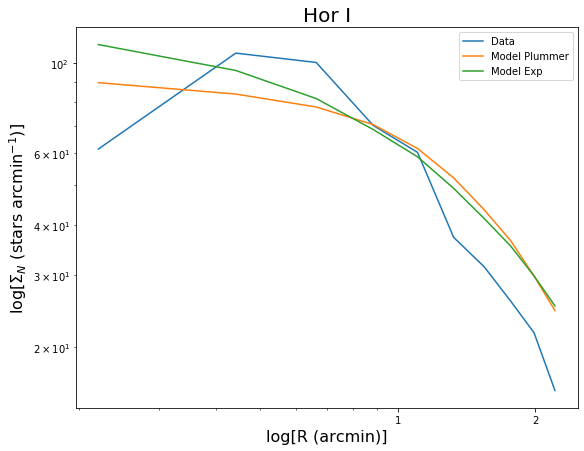

In [75]:
fig, ax = plt.subplots(figsize=(9,7))

ax.plot(dist_x,data_1d,label='Data')
ax.plot(dist_x,model_1d,label='Model Plummer')
ax.plot(dist_x,model_1de,label='Model Exp')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylabel(r'log[$\Sigma_N$ (stars arcmin$^{-1}$)]',fontsize=16)
ax.set_xlabel(r'log[R (arcmin)]',fontsize=16)
ax.set_title('Hor I',fontsize=20)

ax.set_xticks([1, 2])
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())



ax.legend()
plt.savefig('figures/hor1.png')

plt.show()

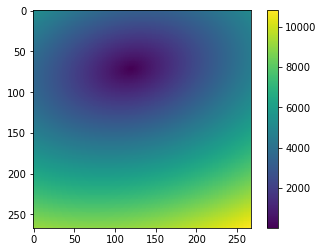

In [26]:
fig,ax = plt.subplots()

plt.imshow(radius)
plt.colorbar()